In [ ]:
!wget https://www.dropbox.com/sh/qwdaldzkp8yrqwj/AADTj_WQcuKA0bsEeCKU__98a?dl=1 -O hotels.zip
!unzip hotels.zip
!ls

--2024-12-16 05:47:14--  https://www.dropbox.com/sh/qwdaldzkp8yrqwj/AADTj_WQcuKA0bsEeCKU__98a?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/m1h6gpb1v5mdbu12vgsjw/AD8vgCQOgnburdugcqnSYPs?rlkey=6xv7z853jpbgs1uu5omdl0ulc&dl=1 [following]
--2024-12-16 05:47:14--  https://www.dropbox.com/scl/fo/m1h6gpb1v5mdbu12vgsjw/AD8vgCQOgnburdugcqnSYPs?rlkey=6xv7z853jpbgs1uu5omdl0ulc&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd35601b10c3515b4249721f53b.dl.dropboxusercontent.com/zip_download_get/CDtZYrMr0Abyg3gANsuiQChUcxra77rld_GklRCYG0Z-eVWoK2BggvsdNqTgKNyk1hGkrblYId3zMUbD75MznJU1VN0ZKd3CzvRK0x6D15mYHg# [following]
--2024-12-16 05:47:15--  https://ucd35601b10c3515b4249721f53b.dl.dropboxusercontent.com/zip_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display, Markdown

In [ ]:
display(Markdown("### Memuat Data"))
df = pd.read_csv('hotels.csv')
display(Markdown("Dataset berhasil dimuat!"))
display(Markdown(f"Jumlah baris: {df.shape[0]}"))
display(Markdown(f"Jumlah kolom: {df.shape[1]}"))

### Memuat Data

Dataset berhasil dimuat!

Jumlah baris: 119390

Jumlah kolom: 32

In [ ]:
# Tampilkan tipe data kolom
display(Markdown("### Tipe Data Kolom"))
display(df.dtypes)

# Tampilkan ringkasan statistik kolom numerik
display(Markdown("### Ringkasan Statistik Kolom Numerik"))
display(df.describe())

# Tampilkan persentase missing values
missing_percentage = df.isnull().mean() * 100
missing_with_values = missing_percentage[missing_percentage > 0]
display(Markdown("### Persentase Missing Values"))
display(missing_with_values)

### Tipe Data Kolom

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


### Ringkasan Statistik Kolom Numerik

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Persentase Missing Values

,0
children,0.003350
country,0.408744
agent,13.686238
company,94.306893


In [ ]:
# Cell 4: Pembersihan Data
display(Markdown("### Pembersihan Data"))

# Data sebelum pembersihan
display(Markdown("#### Data Sebelum Pembersihan"))
display(Markdown(f"Jumlah baris: {df.shape[0]}"))
display(Markdown("Missing values sebelum pembersihan:"))
display(df.isnull().sum())

# Konversi kolom tanggal
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Penanganan missing values
# Kolom numerik: median
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Kolom kategorik: modus
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Hapus duplikat
df = df.drop_duplicates()

# Data setelah pembersihan
display(Markdown("#### Data Setelah Pembersihan"))
display(Markdown(f"Jumlah baris: {df.shape[0]}"))
display(Markdown("Missing values setelah pembersihan:"))
display(df.isnull().sum())

# Tampilkan ringkasan data akhir
display(Markdown("#### Ringkasan Data Akhir"))
display(df.head())  # Tampilkan 5 baris pertama

### Pembersihan Data

#### Data Sebelum Pembersihan

Jumlah baris: 119390

Missing values sebelum pembersihan:

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


#### Data Setelah Pembersihan

Jumlah baris: 87377

Missing values setelah pembersihan:

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


#### Ringkasan Data Akhir

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,179.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,179.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,179.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Visualisasi Distribusi Variabel Numerik

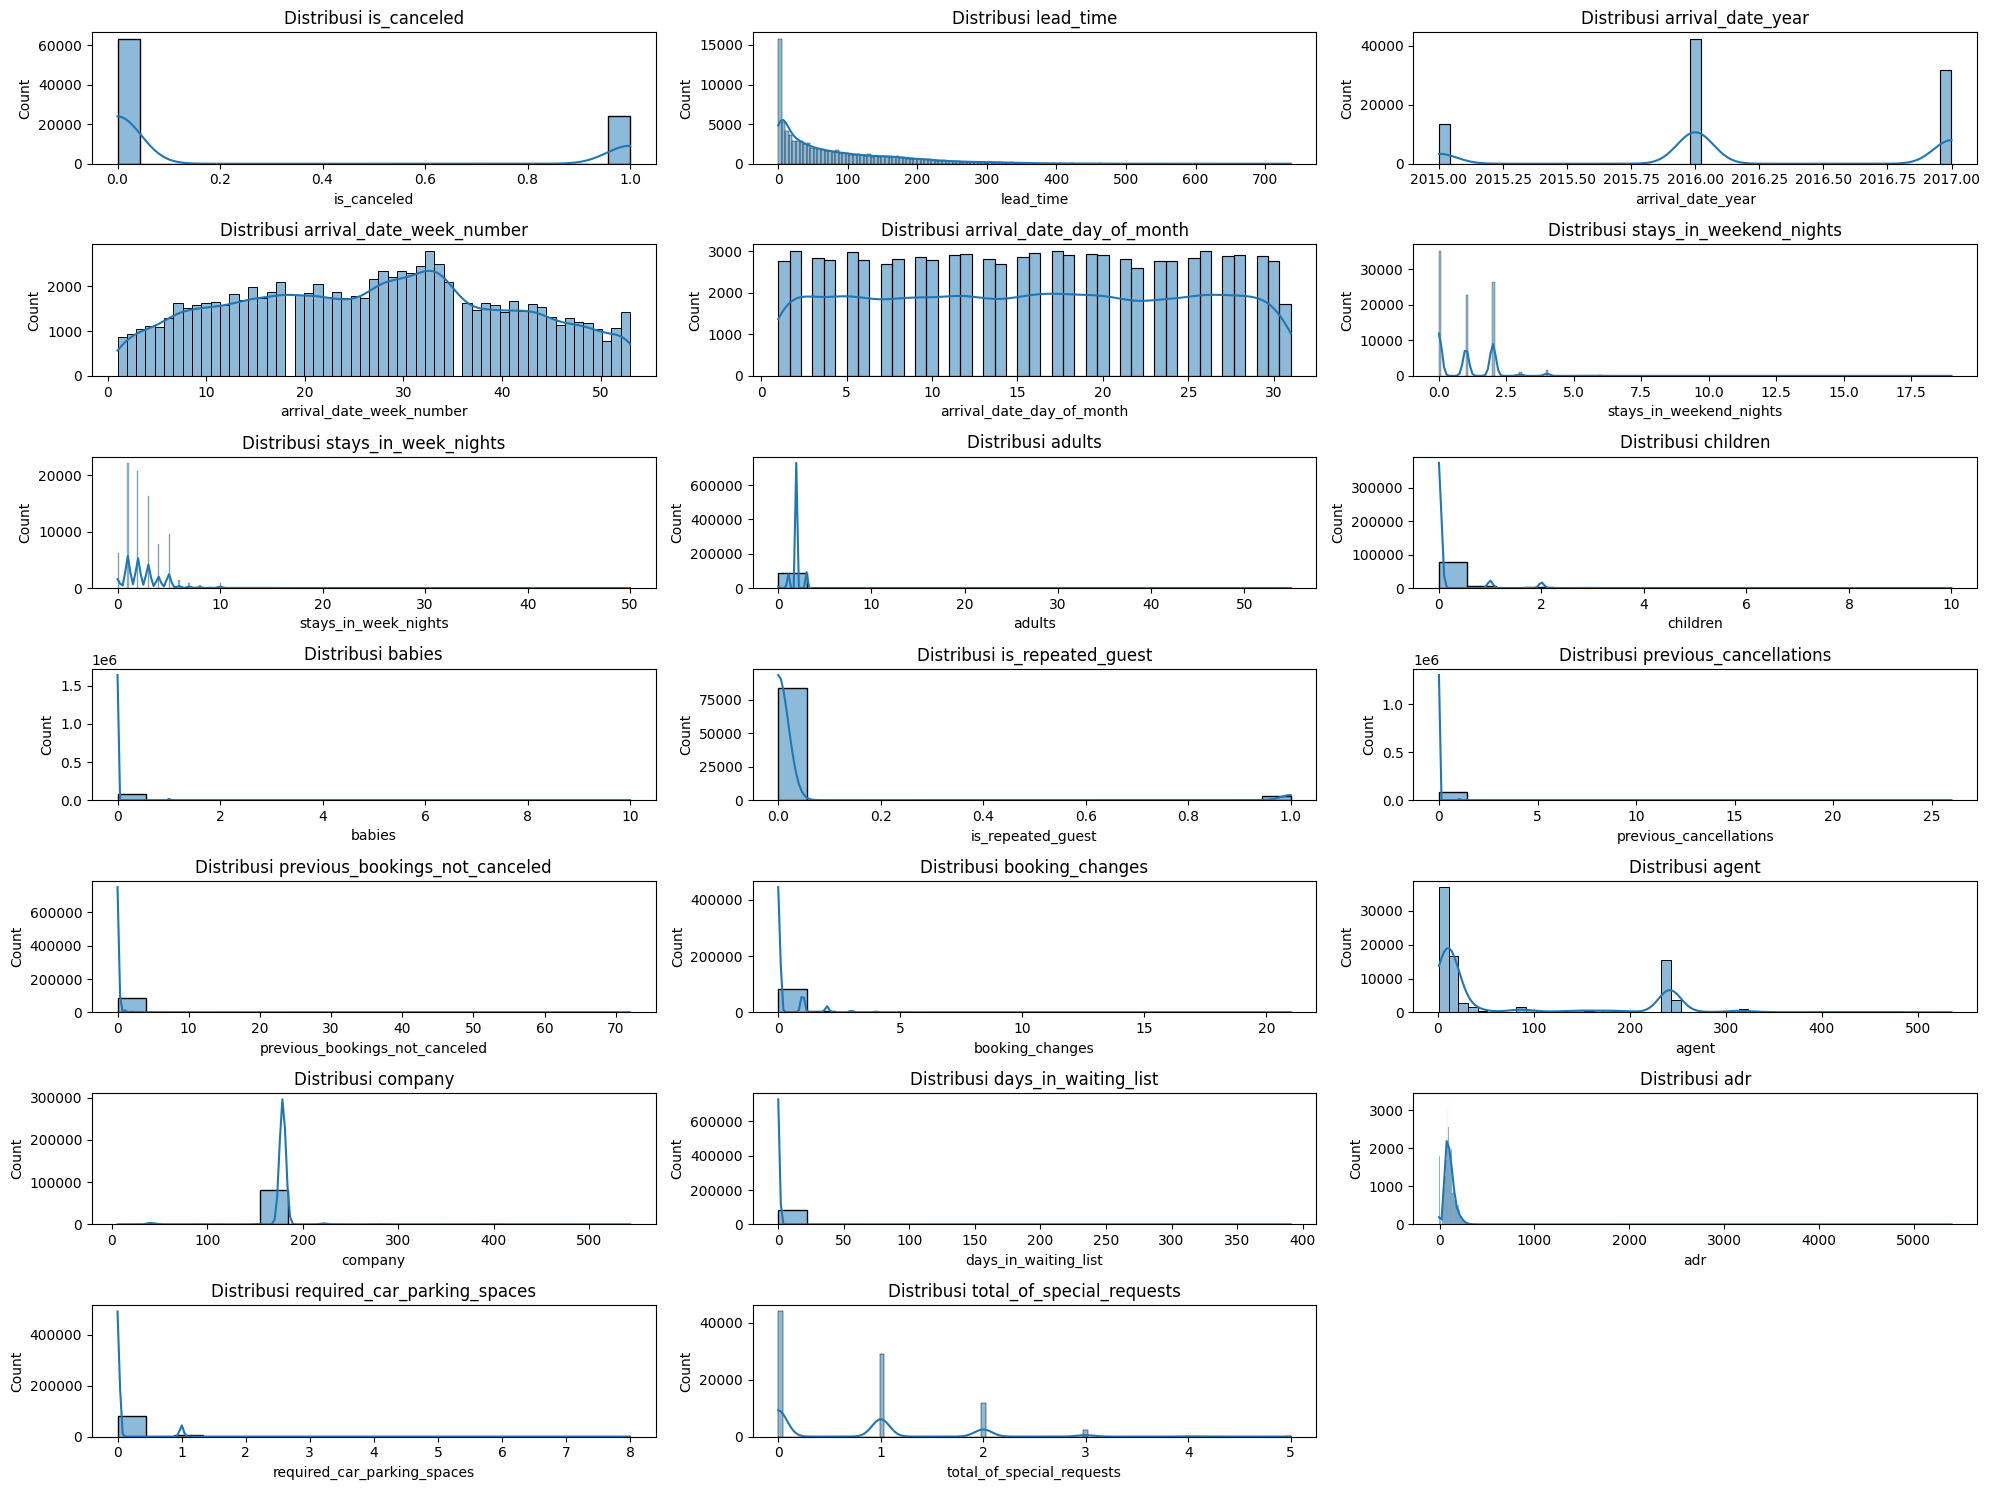

In [ ]:
# Cell 5: Visualisasi Distribusi Variabel Numerik
display(Markdown("### Visualisasi Distribusi Variabel Numerik"))

# Visualisasi distribusi untuk setiap kolom numerik
plt.figure(figsize=(20, 15))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_columns)
num_rows = int(np.ceil(num_cols / 3))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.tight_layout()
plt.show()

### Analisis Korelasi

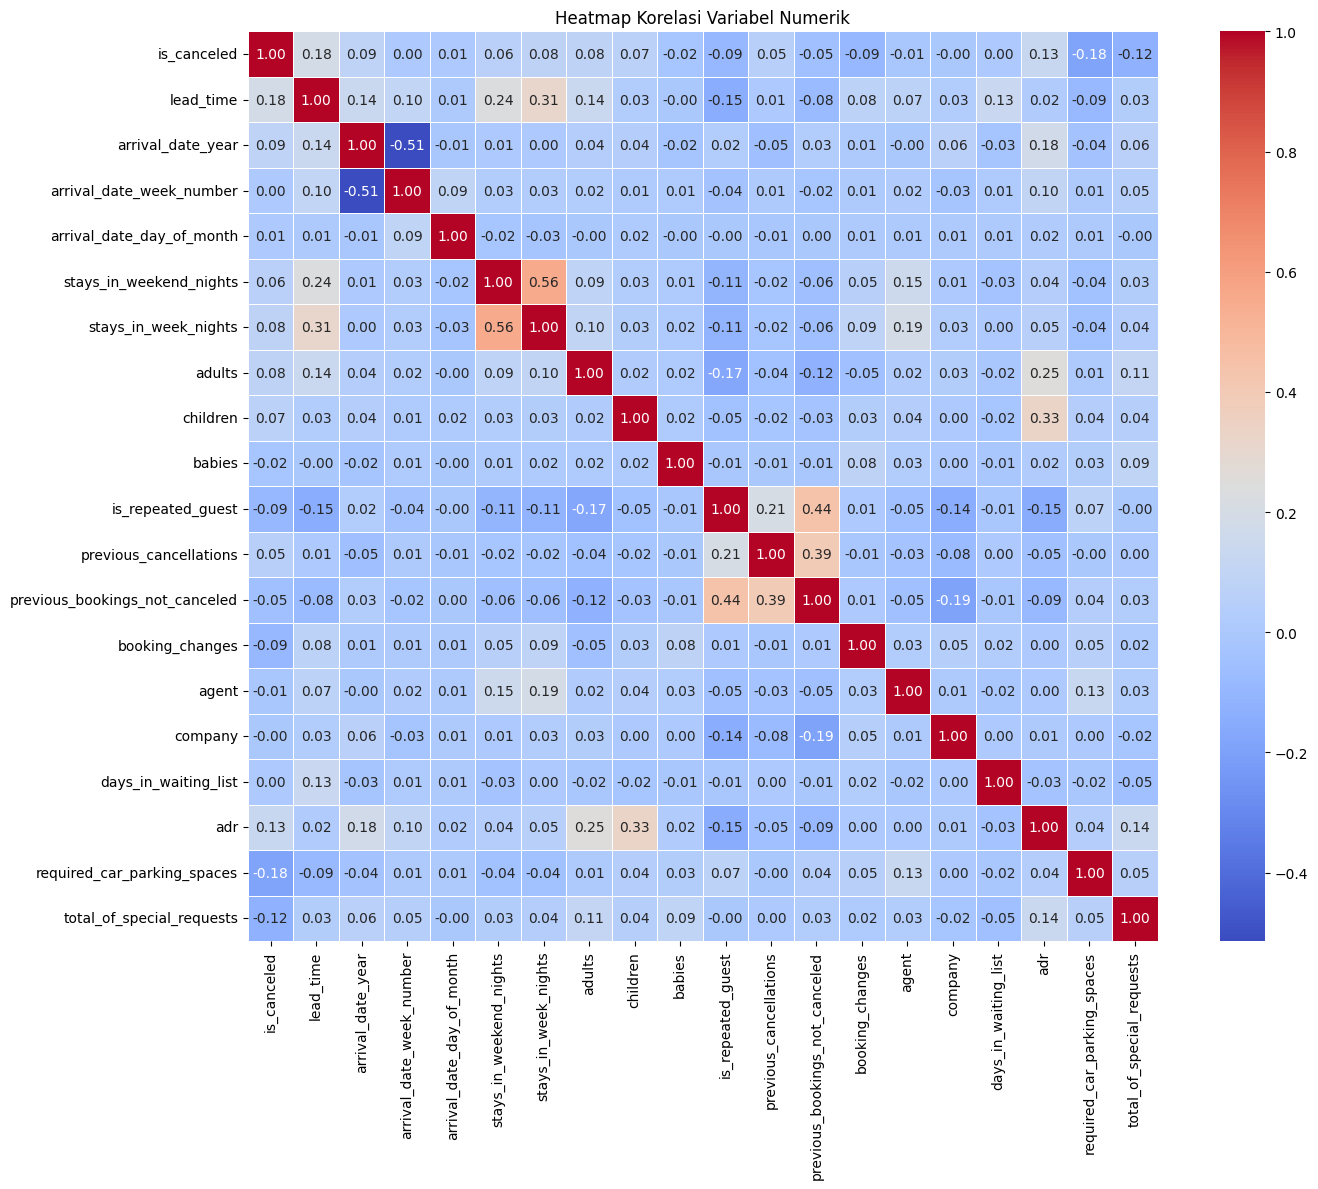

In [ ]:
# Cell 6: Analisis Korelasi
display(Markdown("### Analisis Korelasi"))

# Visualisasi heatmap korelasi antara variabel numerik
plt.figure(figsize=(15, 12))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

**Temuan**  
1. **Variabel yang berkorelasi positif kuat**:  
   - **`stays_in_week_nights`** dengan **`stays_in_weekend_nights`** memiliki korelasi tinggi (0.56) → lama menginap pada hari biasa dan akhir pekan saling berkaitan.  
   - **`previous_cancellations`** dengan **`previous_bookings_not_canceled`** berkorelasi positif (0.44) → pelanggan dengan banyak pembatalan sebelumnya cenderung memiliki riwayat pemesanan tidak dibatalkan.

2. **Variabel dengan korelasi negatif signifikan**:  
   - **`is_canceled`** dengan **`total_of_special_requests`** (-0.18) → semakin banyak permintaan khusus, semakin kecil kemungkinan reservasi dibatalkan.  
   - **`is_canceled`** dengan **`required_car_parking_spaces`** (-0.19) → tamu yang memesan tempat parkir cenderung lebih kecil kemungkinan membatalkan.

3. **Korelasi dengan `lead_time`**:  
   - Korelasi positif dengan **`is_canceled`** (0.18) → semakin lama waktu antara pemesanan dan kedatangan, semakin tinggi peluang pembatalan.

4. **Korelasi lemah secara umum**:  
   - Sebagian besar variabel menunjukkan korelasi lemah (< 0.3) menunjukkan bahwa tidak ada hubungan linear kuat antar variabel numerik dalam dataset ini.

**Wawasan Singkat**
*   Fokus pada variabel seperti **`lead_time`**,  **`total_of_special_requests`**, dan **`required_car_parking_spaces`** dapat membantu memahami pola pembatalan reservasi.
*   **`stays_in_week_nights`** dan **`stays_in_weekend_nights`**  bisa diolah bersama untuk analisis durasi menginap pelanggan.
*   Korelasi yang lemah secara keseluruhan mengindikasikan bahwa faktor non-numerik memainkan peran lebih signifikan.



### Analisis Distribusi Kategorik

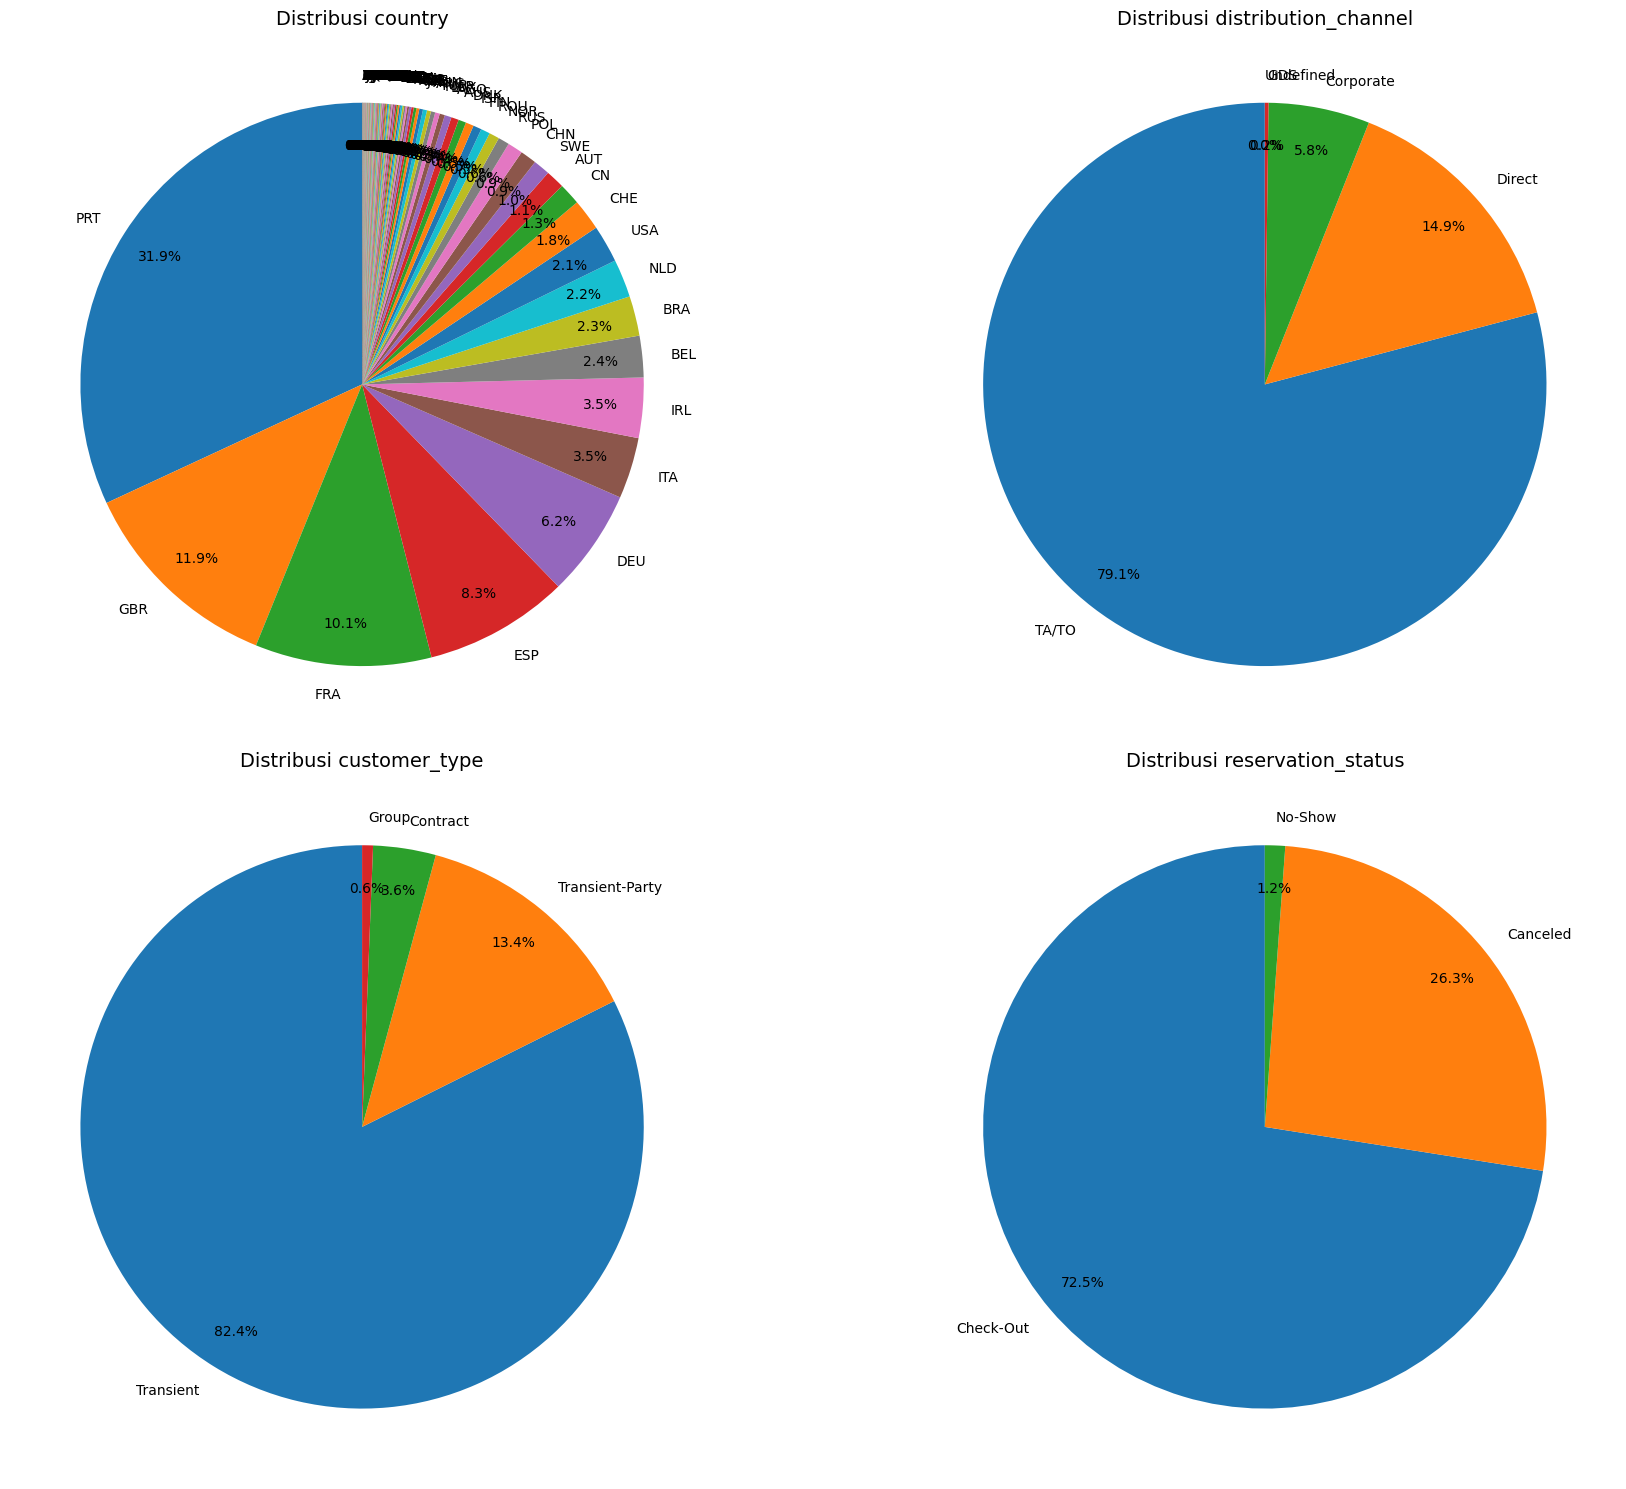

In [ ]:
# Cell 7: Analisis Distribusi Kategorik
display(Markdown("### Analisis Distribusi Kategorik"))

# Visualisasi distribusi kategori menggunakan pie chart
plt.figure(figsize=(20, 15))
categorical_columns = ['country', 'distribution_channel', 'customer_type', 'reservation_status']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts(normalize=True).plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
    )
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Temuan**
1.  **Distribusi country:**
    *   Mayoritas tamu berasal dari Portugal (PRT) dengan 31.9%, diikuti oleh Inggris (GBR) dengan 11.9% dan Prancis (FRA) dengan 10.1%.
    *   Negara lain memiliki kontribusi kecil dengan distribusi yang tersebar.
2.  **Distribusi distribution_channel:**
    *   LTA/TO (Travel Agent/ Tour Operator) mendominasi sebesar 79.1%, sedangkan pemesanan Direct hanya 14.9%.
    *   Saluran Corporate dan Undefined memiliki persentase sangat kecil.
3.  **Distribusi customer_type:**
    *   Sebagian besar pelanggan adalah tipe Transient 82.4% yaitu tamu individu tanpa paket grup.
    *   Tipe Transient-Party memiliki 13.4%, sedangkan Group dan Contract hanya 4.2% dan 0.6%.
4. **Distribusi reservation_status:**
   *   Sebagian besar reservasi berakhir dengan Check-Out (72.5%).
   *   Sekitar 26.3% reservasi dibatalkan (Canceled), sementara No-Show hanya 1.2%.

**Wawasan Singkat**
*   Portugal mendominasi sebagai negara asal tamu.
*   Mayoritas reservasi datang melalui agen perjalanan (TA/TO).
*   Sebagian besar pelanggan adalah individu (Transient), dan tingkat pembatalan cukup signifikan (26.3%).
*   Fokus pada pengurangan Cancellation bisa meningkatkan performa reservasi.

### Analisis Tren Waktu

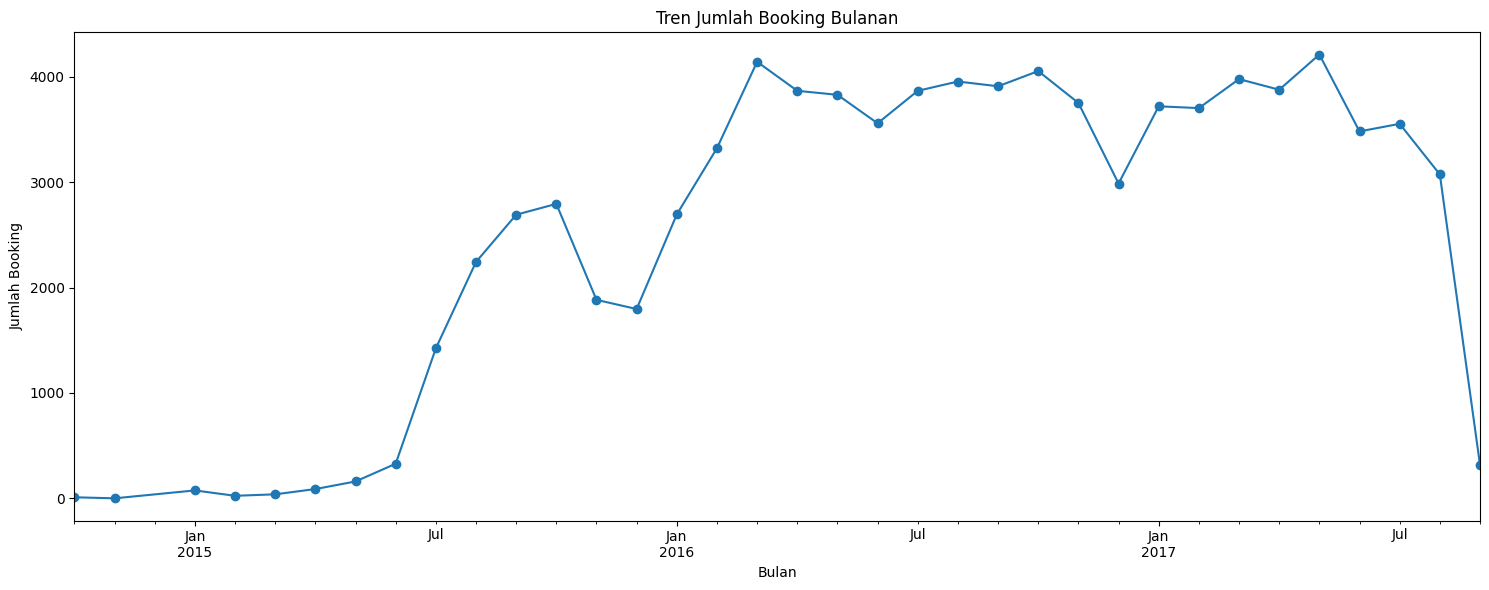

In [ ]:
# Cell 8: Analisis Tren Waktu
display(Markdown("### Analisis Tren Waktu"))

# Ekstrak bulan dari tanggal reservasi
df['booking_month'] = df['reservation_status_date'].dt.to_period('M')

# Agregasi bulanan
monthly_trends = df.groupby('booking_month').size()

# Visualisasi tren jumlah booking bulanan
plt.figure(figsize=(15, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Tren Jumlah Booking Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Booking')
plt.tight_layout()
plt.show()

**Temuan**  
1. **Tren Jumlah Booking Bulanan**:  
   * Jumlah booking mengalami peningkatan tajam mulai pertengahan 2015, dengan puncaknya di awal tahun 2016.  
   * Selama 2016 hingga 2017, jumlah booking cenderung stabil di angka 3.500-4.000 per bulan, meskipun terdapat fluktuasi kecil.  
   * Penurunan signifikan terjadi menjelang akhir periode tren, dengan jumlah booking turun drastis hingga mendekati nol.  

2. **Pola Kenaikan dan Penurunan**:  
   * Kenaikan drastis pertama terlihat sekitar pertengahan 2015, menunjukkan adanya lonjakan permintaan.  
   * Stabilitas terjadi selama tahun 2016 hingga awal 2017, menandakan periode puncak bisnis.  
   * Penurunan tajam di akhir tren mengindikasikan adanya kejadian yang memengaruhi penurunan jumlah booking secara signifikan.  

**Wawasan Singkat**  
* Periode pertengahan 2015 hingga awal 2016 adalah fase ekspansi bisnis dengan peningkatan jumlah booking yang signifikan.  
* Tahun 2016 hingga awal 2017 menunjukkan fase stabilisasi dengan performa bisnis yang cukup tinggi.  
* Penurunan tajam di akhir tren bisa disebabkan oleh faktor eksternal seperti perubahan kebijakan, penurunan permintaan, atau kejadian ekonomi.  

In [ ]:
# Cell 9: Analisis Lanjutan - Booking berdasarkan Tipe Pelanggan
display(Markdown("### Analisis Lanjutan - Booking berdasarkan Tipe Pelanggan"))

# Analisis jumlah dan rata-rata harga per tipe pelanggan
customer_type_bookings = df.groupby('customer_type')['adr'].agg(['mean', 'count'])

# Tampilkan hasil analisis
display(customer_type_bookings)

### Analisis Lanjutan - Booking berdasarkan Tipe Pelanggan

,mean,count
customer_type,,
Contract,92.753036,3139
Group,84.361949,544
Transient,110.146249,71972
Transient-Party,87.666458,11722


**Temuan**  
1. **Distribusi Jumlah Booking Berdasarkan Tipe Pelanggan**:  
   * Transient mendominasi dengan 71.972 booking, menjadikannya segmen pelanggan terbesar.
   * Transient-Party menyusul dengan 11.722 booking, sedangkan Contract dan Group memiliki jumlah booking yang jauh lebih kecil, yaitu 3.139 dan 544 booking.

2. **Rata-rata Harga per Tipe Pelanggan (ADR - Average Daily Rate)**:  
   * Transient memiliki ADR tertinggi sebesar 110.15, menunjukkan tarif harian rata-rata yang lebih mahal dibanding tipe pelanggan lainnya.  
   * Contract dan Transient-Party memiliki tarif harian rata-rata yang lebih rendah, masing-masing 92.75 dan 87.67.
   * Group memiliki ADR terendah sebesar 84.36, menandakan kemungkinan adanya diskon khusus untuk pemesanan grup.


**Wawasan Singkat**  
* Segmen Transient adalah pelanggan utama dengan kontribusi terbesar dalam jumlah booking sekaligus memiliki ADR tertinggi, menunjukkan peluang pendapatan maksimal dari pelanggan individu ini.
* Segmen Group dan Contract memiliki kontribusi yang kecil dalam jumlah booking dan tarif lebih rendah, yang memerlukan strategi khusus untuk meningkatkan performa.  
* Fokus pada segmen Transient-Party dapat menjadi peluang tambahan untuk mendorong pendapatan dengan meningkatkan tarif atau frekuensi pemesanan.

### Analisis Distribusi Channel

,count
distribution_channel,
TA/TO,69136
Direct,12980
Corporate,5075
GDS,181
Undefined,5


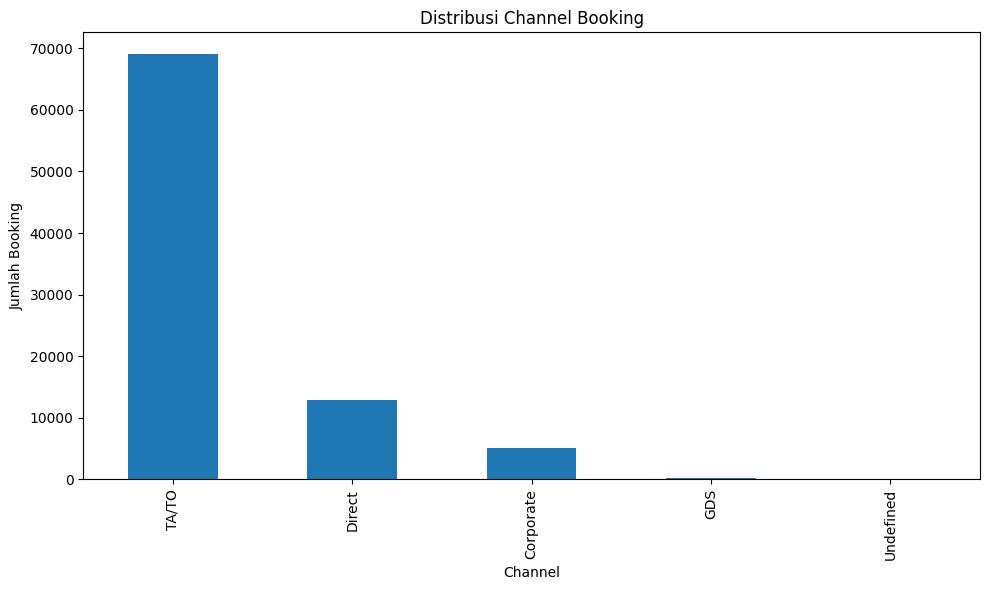

In [ ]:
# Cell 10: Analisis Distribusi Channel
display(Markdown("### Analisis Distribusi Channel"))

# Distribusi jumlah booking berdasarkan channel
channel_distribution = df['distribution_channel'].value_counts()

# Tampilkan hasil distribusi channel booking
display(channel_distribution)

# Visualisasi distribusi channel booking
plt.figure(figsize=(10, 6))
channel_distribution.plot(kind='bar')
plt.title('Distribusi Channel Booking')
plt.xlabel('Channel')
plt.ylabel('Jumlah Booking')
plt.tight_layout()
plt.show()


**Temuan**  
1. **Distribusi Jumlah Booking Berdasarkan Channel**:  
   * TA/TO (Travel Agent/Tour Operator) mendominasi dengan 69.136 booking, menjadikannya saluran pemesanan utama.  
   * Saluran Direct memiliki 12.980 booking yang menempati posisi kedua.  
   * Saluran Corporate menyumbang 5.075 booking, jauh di bawah dua saluran utama.  
   * Saluran GDS dan Undefined memiliki kontribusi yang sangat kecil, masing-masing 181 dan 5 booking.  

**Wawasan Singkat**  
* TA/TO menjadi saluran dominan untuk booking, yang menunjukkan ketergantungan besar pada agen perjalanan dan operator tur.  
* Saluran Direct menunjukkan potensi untuk dikembangkan lebih lanjut agar dapat meningkatkan pendapatan langsung tanpa perantara.  
* Fokus pada peningkatan performa saluran Corporate dapat membantu mendiversifikasi sumber booking.  
* Saluran GDS dan Undefined memerlukan evaluasi lebih lanjut karena kontribusinya yang sangat kecil.

In [ ]:
# Cell 11: Segmentasi Berdasarkan Negara
display(Markdown("### Segmentasi Berdasarkan Negara"))

# Analisis mendalam karakteristik booking per negara
country_segments = df.groupby('country').agg({
    'is_repeated_guest': 'mean',
    'adr': ['mean', 'max', 'min'],
    'total_of_special_requests': 'mean',
    'booking_changes': 'mean',
    'previous_cancellations': 'sum',
    'reserved_room_type': lambda x: x.mode().iloc[0]
}).sort_values(('adr', 'mean'), ascending=False)

# Tampilkan top 10 negara
print("Segmentasi Top 10 Negara:")
display(country_segments.head(10))

### Segmentasi Berdasarkan Negara

Segmentasi Top 10 Negara:


is_repeated_guest         adr                  \
                     mean        mean     max     min   
country                                                 
DJI                   0.0  273.000000  273.00  273.00   
AIA                   0.0  265.000000  265.00  265.00   
AND                   0.0  202.652857  354.00   75.00   
UMI                   0.0  200.000000  200.00  200.00   
LAO                   0.0  181.665000  183.33  180.00   
MYT                   0.0  177.750000  256.50   99.00   
NCL                   0.0  175.500000  175.50  175.50   
GIB                   0.0  169.082667  250.00   57.00   
FRO                   0.0  165.666667  202.50  139.50   
COM                   0.0  165.305000  259.00   71.61   

        total_of_special_requests booking_changes previous_cancellations  \
                             mean            mean                    sum   
country                                                                    
DJI                      0.000000        0.000000                      0   
AIA                      0.000000        0.000000                      0   
AND                      0.428571        0.142857                      0   
UMI                      1.000000        0.000000                      0   
LAO                      1.000000        0.000000                      0   
MYT                      0.500000        0.000000                      0   
NCL                      2.000000        0.000000                      0   
GIB                      1.133333        0.466667                      0   
FRO                      0.666667        0.333333                      0   
COM                      1.000000        0.000000                      0   

        reserved_room_type  
                  <lambda>  
country                     
DJI                      G  
AIA                      G  
AND                      A  
UMI                      E  
LAO                      D  
MYT                      A  
NCL                      E  
GIB                      A  
FRO                      D  
COM                      A

**Temuan**  
1. **Negara dengan Rata-Rata ADR Tertinggi**:  
   * Djibouti (DJI) memiliki rata-rata ADR tertinggi sebesar 273.00.  
   * Disusul oleh Anguilla (AIA) dengan 265.00 dan Andorra (AND) sebesar 202.65.  
   * Negara-negara ini cenderung memiliki booking dengan tarif harian rata-rata tinggi, meskipun jumlah pengunjung relatif kecil.  

2. **Negara dengan Aktivitas Tambahan**:  
   * UMI dan LAO menunjukkan rata-rata booking changes tertinggi (1.0), mengindikasikan tamu sering melakukan perubahan pemesanan.  
   * NCL dan GIB memiliki total special requests lebih tinggi, menunjukkan kebutuhan tambahan dari tamu yang lebih kompleks.  

3. **Tipe Kamar Terpopuler Berdasarkan Negara**:  
   * Tipe G paling sering dipesan di negara seperti DJI dan AIA.  
   * Tipe A mendominasi di negara seperti AND, MYT, dan GIB.  

**Wawasan Singkat**  
* Negara dengan ADR tinggi cenderung memiliki jumlah pemesanan lebih sedikit tetapi memberikan pendapatan premium per pemesanan. Strategi promosi dapat difokuskan untuk mempertahankan pasar ini.  
* Negara dengan total special requests dan booking changes tinggi memerlukan layanan pelanggan yang lebih fleksibel dan responsif untuk memenuhi kebutuhan tamu.  
* Segmentasi kamar berdasarkan negara dapat digunakan untuk menargetkan preferensi tamu dalam penawaran paket khusus.

### Visualisasi Segmentasi Negara

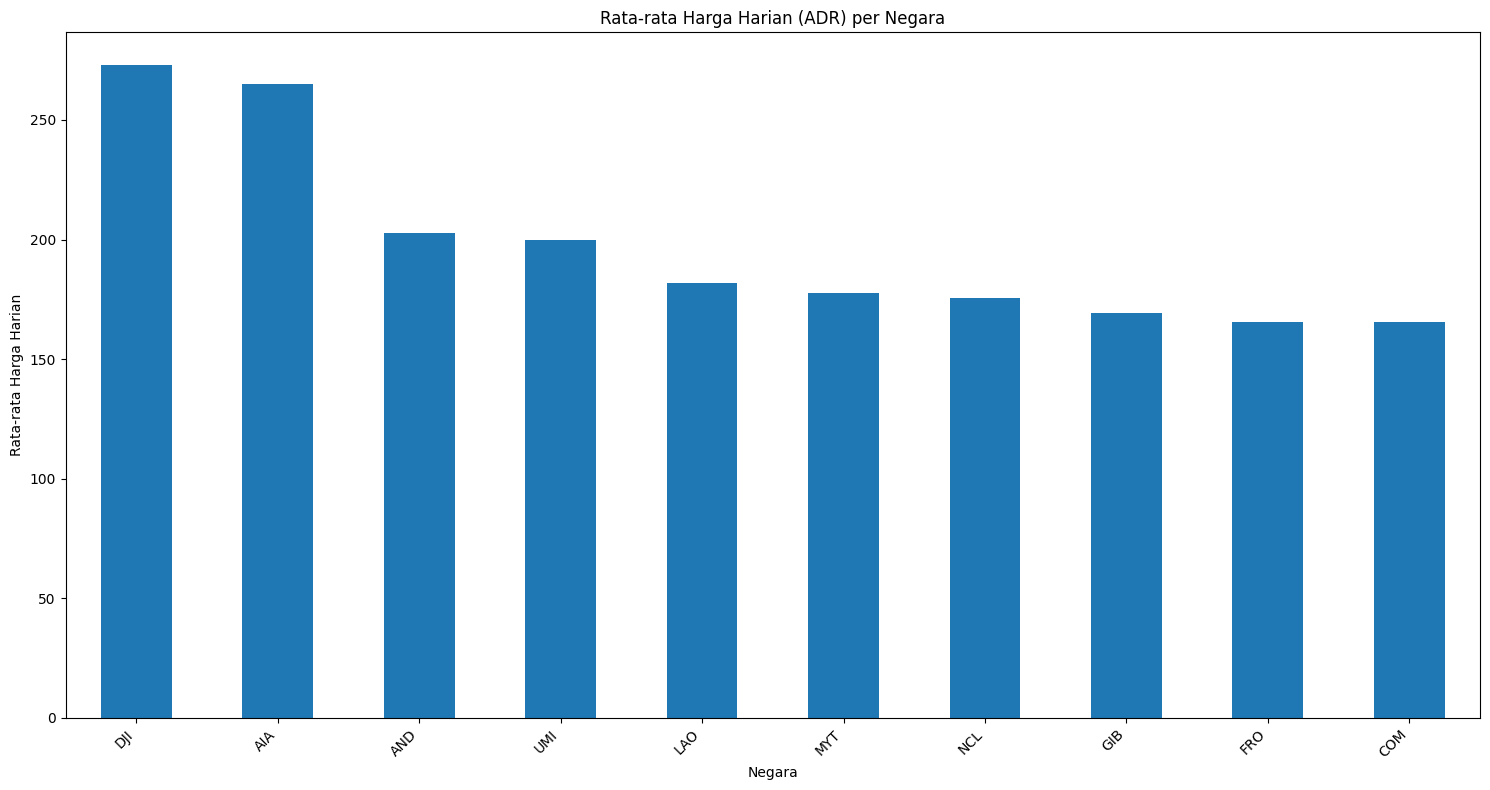

In [ ]:
# Cell 12: Visualisasi Segmentasi Negara
display(Markdown("### Visualisasi Segmentasi Negara"))

# Visualisasi rata-rata harga harian (ADR) per negara
plt.figure(figsize=(15, 8))
country_segments[('adr', 'mean')].head(10).plot(kind='bar')
plt.title('Rata-rata Harga Harian (ADR) per Negara')
plt.xlabel('Negara')
plt.ylabel('Rata-rata Harga Harian')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Temuan**  
1. **Distribusi Rata-rata Harga Harian (ADR) per Negara:**
   * Negara DJI memiliki rata-rata harga harian (ADR) tertinggi di antara semua negara.
   * Diikuti oleh negara AIA yang juga memiliki ADR yang tinggi tetapi sedikit di bawah DJI.
   * Negara AND, UMI, dan LAO berada di urutan selanjutnya dengan ADR yang menengah.
   * Sementara negara NCL, GIB, FRO, dan COM memiliki ADR lebih rendah dan cenderung serupa.

2. **Rentang Perbedaan Harga:**
   * Terdapat perbedaan signifikan antara ADR negara dengan peringkat tertinggi (DJI dan AIA) dan ADR negara terendah (FRO, COM, GIB).  

3. **Top 2 Negara Dominan:**
   * DJI dan AIA mendominasi segmen ini dengan harga yang jauh lebih tinggi dibandingkan negara lainnya.

**Wawasan Singkat**  
* Negara dengan ADR tertinggi seperti DJI dan AIA berpotensi memiliki permintaan yang lebih eksklusif, yang mungkin berkaitan dengan segmen premium.
* Negara-negara dengan ADR lebih rendah (seperti FRO dan COM) bisa berfokus pada strategi peningkatan harga atau nilai tambah untuk meningkatkan profitabilitas.
* Mengidentifikasi faktor yang mempengaruhi ADR di negara-negara tertinggi dapat membantu merancang strategi yang optimal untuk negara dengan ADR lebih rendah.

In [ ]:
# Cell 13: Segmentasi Tipe Pelanggan
display(Markdown("### Segmentasi Berdasarkan Tipe Pelanggan"))

# Analisis segmentasi berdasarkan tipe pelanggan
customer_type_segments = df.groupby('customer_type').agg({
    'is_repeated_guest': 'mean',
    'adr': ['mean', 'sum'],
    'total_of_special_requests': 'mean',
    'booking_changes': 'mean',
    'previous_cancellations': 'sum',
    'days_in_waiting_list': 'mean'
})

# Tampilkan hasil segmentasi berdasarkan tipe pelanggan
display(customer_type_segments)

### Segmentasi Berdasarkan Tipe Pelanggan

is_repeated_guest         adr              \
                             mean        mean         sum   
customer_type                                               
Contract                 0.010513   92.753036   291151.78   
Group                    0.286765   84.361949    45892.90   
Transient                0.040794  110.146249  7927445.83   
Transient-Party          0.024740   87.666458  1027626.22   

                total_of_special_requests booking_changes  \
                                     mean            mean   
customer_type                                               
Contract                         0.838484        0.150048   
Group                            0.645221        0.303309   
Transient                        0.732132        0.224282   
Transient-Party                  0.457857        0.593585   

                previous_cancellations days_in_waiting_list  
                                   sum                 mean  
customer_type                                                
Contract                           204             0.019433  
Group                               16             0.391544  
Transient                         2009             0.177930  
Transient-Party                    429             4.472701

**Temuan**  
1. **Segmentasi Berdasarkan Tipe Pelanggan**:  
   - **Contract**:
     - Rata-rata ADR: 92.75  
     - Total pendapatan ADR: 291,151.78
     - Tingkat pelanggan berulang sangat rendah (1.05%)  
     - Rata-rata permintaan khusus: 0.84
     - Pembatalan sebelumnya rendah (204)  
     - Waktu daftar tunggu hampir nol (0.02).  

   - **Group**:  
     - Rata-rata ADR: 84.36 (terendah di antara semua segmen).  
     - Total pendapatan ADR: 45,892.90
     - Tingkat pelanggan berulang tertinggi (28.68%)  
     - Permintaan khusus rendah (0.65).  
     - Waktu daftar tunggu tertinggi (0.39) dibandingkan segmen lain.  

   - **Transient**:  
     - Rata-rata ADR: 110.15 (tertinggi).  
     - Total pendapatan ADR: 7,927,445.83(paling signifikan).  
     - Tingkat pelanggan berulang: 4.08%
     - Pembatalan sebelumnya tertinggi (2009).  
     - Permintaan khusus dan perubahan pemesanan relatif tinggi.  

   - **Transient-Party**:  
     - Rata-rata ADR: 87.67
     - Total pendapatan ADR: 1,027,626.22
     - Tingkat pelanggan berulang: 2.47%
     - Permintaan khusus 0.45(terendah).  
     - Waktu daftar tunggu tertinggi (4.47) di antara semua segmen.  

**Wawasan Singkat**  
- Transient menjadi segmen pelanggan terbesar dengan kontribusi ADR tertinggi, namun memiliki tingkat pembatalan yang tinggi. Fokus pada pengurangan pembatalan dapat meningkatkan kinerja pendapatan.  
- Group menunjukkan loyalitas pelanggan yang tertinggi, meskipun ADR-nya paling rendah. Strategi peningkatan harga dapat dimaksimalkan untuk segmen ini.  
- Contract memiliki ADR yang rendah dan tingkat pelanggan berulang yang hampir nol. Segmen ini bisa diperbaiki dengan program loyalitas.  
- Transient-Party memerlukan perhatian pada waktu daftar tunggu yang tinggi (4.47), yang bisa menghambat konversi pemesanan.  


### Visualisasi Segmentasi Tipe Pelanggan

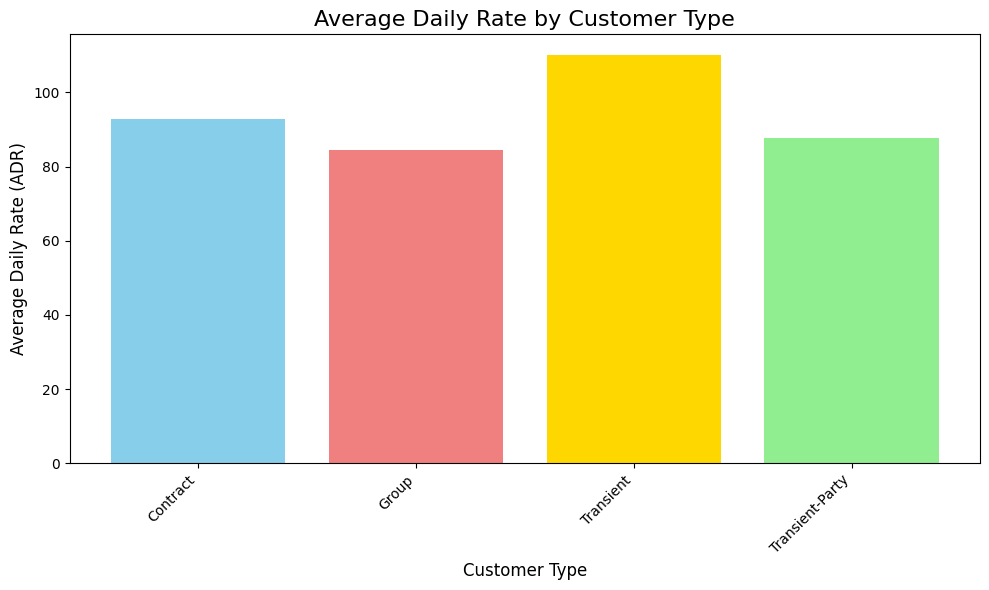

In [ ]:
# Cell 14: Visualisasi Segmentasi Tipe Pelanggan
display(Markdown("### Visualisasi Segmentasi Tipe Pelanggan"))

# Visualisasi rata-rata harga harian (ADR) berdasarkan tipe pelanggan
customer_types = customer_type_segments.index
mean_adr = customer_type_segments['adr']['mean']

plt.figure(figsize=(10, 6))
plt.bar(customer_types, mean_adr, color=['skyblue', 'lightcoral', 'gold', 'lightgreen'])
plt.title('Average Daily Rate by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

**Temuan**
1. **Rata-rata Harga Harian (ADR) Berdasarkan Tipe Pelanggan**:  
   - Transient memiliki ADR tertinggi sekitar 110, yang mencerminkan nilai ekonomi lebih tinggi dibandingkan tipe pelanggan lainnya.  
   - Contract menempati posisi kedua dengan ADR sekitar 93, menunjukkan stabilitas meski tidak seefisien segmen Transient.  
   - Group memiliki ADR terendah sekitar 84, yang mungkin disebabkan oleh harga diskon atau paket khusus untuk rombongan.  
   - Transient-Party memiliki ADR sekitar 87, sedikit lebih tinggi dibandingkan Group tetapi masih jauh di bawah Transient.  

2. **Pola Perbandingan**:
   - Tipe pelanggan Transient memiliki kontribusi signifikan terhadap pendapatan melalui ADR tertinggi.  
   - Tipe Group dan Transient-Party menunjukkan potensi peningkatan ADR dengan pendekatan harga yang lebih optimal.  

**Wawasan Singkat**  
- Segmen Transient menjadi fokus utama karena memiliki ADR tertinggi, menandakan tamu individu bersedia membayar lebih untuk fleksibilitas dan kenyamanan.  
- Segmen Group dan Transient-Party dapat ditingkatkan dengan strategi upselling atau layanan bernilai tambah untuk mendorong peningkatan ADR.  
- Segmen Contract memiliki stabilitas meskipun ADR cukup rendah, sehingga pendekatan kontrak jangka panjang dengan nilai lebih bisa dieksplorasi.  

In [ ]:
# Cell 14: Segmentasi Berdasarkan Channel Distribusi
display(Markdown("### Segmentasi Berdasarkan Channel Distribusi"))

# Analisis segmentasi berdasarkan channel distribusi
distribution_channel_segments = df.groupby('distribution_channel').agg({
    'is_repeated_guest': 'mean',
    'adr': ['mean', 'sum'],
    'total_of_special_requests': 'mean',
    'booking_changes': 'mean',
    'previous_cancellations': 'sum',
    'booking_changes': 'mean'
})

# Tampilkan hasil segmentasi berdasarkan channel distribusi
display(distribution_channel_segments)

### Segmentasi Berdasarkan Channel Distribusi

is_repeated_guest         adr              \
                                  mean        mean         sum   
distribution_channel                                             
Corporate                     0.303251   68.556095   347922.18   
Direct                        0.070647  109.133833  1416557.15   
GDS                           0.016575  120.317845    21777.53   
TA/TO                         0.013828  108.563247  7505628.67   
Undefined                     0.000000   46.240000      231.20   

                     total_of_special_requests booking_changes  \
                                          mean            mean   
distribution_channel                                             
Corporate                             0.255961        0.428768   
Direct                                0.568182        0.426733   
GDS                                   0.204420        0.099448   
TA/TO                                 0.756842        0.231471   
Undefined                             1.400000        0.000000   

                     previous_cancellations  
                                        sum  
distribution_channel                         
Corporate                               893  
Direct                                  344  
GDS                                       0  
TA/TO                                  1421  
Undefined                                 0

**Temuan**  
1. **Segmentasi Berdasarkan Channel Distribusi**:  
   - **Corporate**:  
     - Rata-rata ADR: 68.56 (terendah di antara channel).  
     - Total pendapatan ADR: 347,922.18.  
     - Tingkat pelanggan berulang tinggi (**30.33%**).  
     - Rata-rata permintaan khusus dan pembatalan sedang.  
   - **Direct**:  
     - Rata-rata ADR: 109.13.  
     - Total pendapatan ADR: 1,416,557.15.  
     - Tingkat pelanggan berulang rendah (7.06%).  
     - Rata-rata permintaan khusus cukup tinggi (0.57).  
     - Pembatalan sebelumnya rendah.  
   - **GDS**:  
     - Rata-rata ADR: 120.32 (tertinggi di antara channel).  
     - Total pendapatan ADR: 21,777.53 (kecil, menunjukkan volume rendah).  
     - Tingkat pelanggan berulang sangat rendah (1.66%).  
     - Hampir tidak ada pembatalan sebelumnya.  
   - **TA/TO (Travel Agent/Tour Operator)**:  
     - Rata-rata ADR: 108.56.  
     - Total pendapatan ADR: 7,505,628.67 (paling signifikan).  
     - Tingkat pelanggan berulang sangat rendah (1.38%).  
     - Rata-rata permintaan khusus rendah (0.75).  
   - **Undefined**:  
     - Rata-rata ADR: 46.24 (terendah).  
     - Total pendapatan ADR: 231.20 (tidak signifikan).  
     - Rata-rata perubahan pemesanan tertinggi (1.4) meskipun hampir tidak ada permintaan khusus atau pembatalan.  

**Wawasan Singkat**  
- TA/TO mendominasi dalam kontribusi pendapatan ADR (7.5 juta) meskipun tingkat pelanggan berulang rendah. Fokus pada peningkatan loyalitas dapat memberikan keuntungan jangka panjang.  
- GDS memiliki ADR tertinggi (120.32) namun dengan volume rendah. Optimalisasi penggunaan GDS dapat meningkatkan pendapatan tambahan.  
- Corporate memiliki potensi loyalitas pelanggan (30.33%) tetapi ADR terendah, sehingga strategi peningkatan nilai penawaran bisa dilakukan.  
- Direct memberikan keseimbangan baik antara ADR tinggi dan volume pendapatan signifikan. Promosi pemesanan langsung bisa ditingkatkan untuk mengurangi ketergantungan pada pihak ketiga.  
- Undefined memiliki kontribusi yang sangat kecil dan performa rendah, sehingga perlu ditinjau ulang atau dimasukkan ke kategori yang lebih jelas.  

### Analisis Kompleks - Klasterisasi

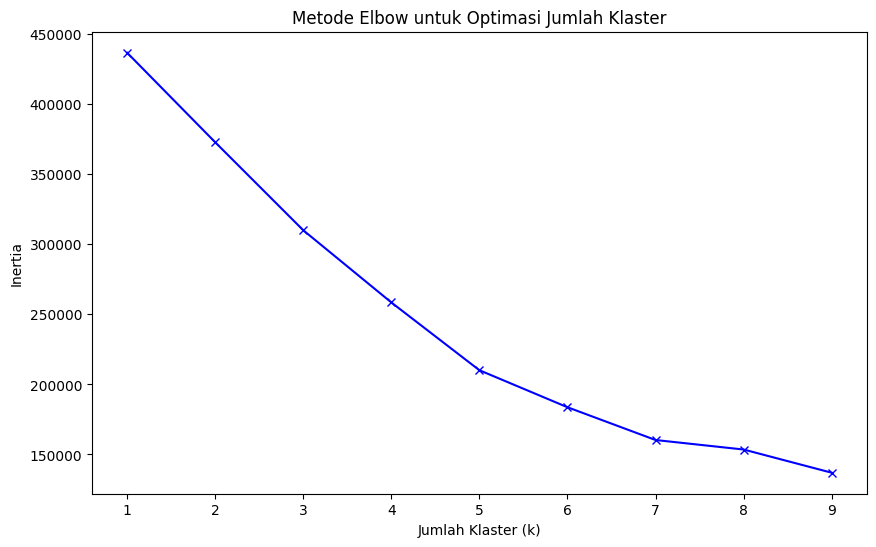


Profil Klaster:


,adr,total_of_special_requests,booking_changes,previous_cancellations,days_in_waiting_list,is_repeated_guest
cluster,,,,,,
0,141.240608,1.503947,0.334725,0.018038,0.024431,0.021724
1,87.525881,0.264267,0.234259,0.037377,0.253134,0.048777
2,81.495287,0.129676,0.700748,0.000000,125.945137,0.004988


In [ ]:
# Cell 15: Analisis Kompleks - Klasterisasi
display(Markdown("### Analisis Kompleks - Klasterisasi"))

# Pilih fitur untuk klasterisasi
clustering_features = [
    'adr',
    'total_of_special_requests',
    'booking_changes',
    'previous_cancellations',
    'days_in_waiting_list'
]

# Siapkan data untuk klasterisasi
X = df[clustering_features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tentukan jumlah klaster optimal menggunakan metode elbow
inertias = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Optimasi Jumlah Klaster')
plt.show()

# Lakukan klasterisasi dengan jumlah klaster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analisis karakteristik klaster
cluster_profiles = df.groupby('cluster')[clustering_features + ['is_repeated_guest']].mean()
print("\nProfil Klaster:")
display(cluster_profiles)

### Visualisasi Klaster

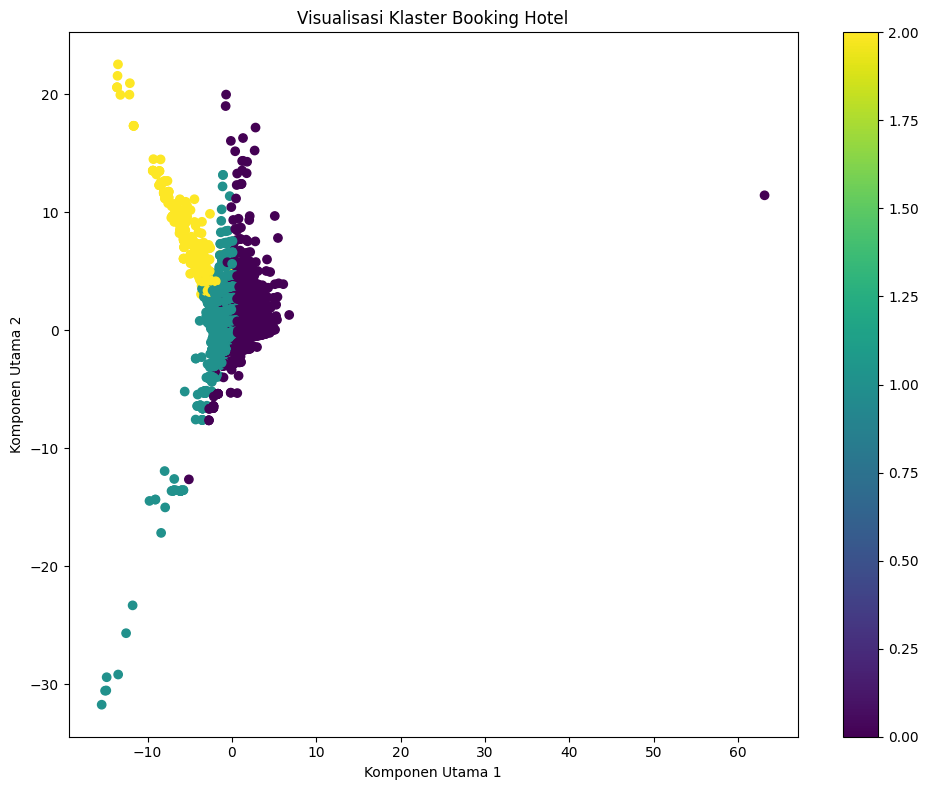

In [ ]:
# Cell 16: Visualisasi Klaster
display(Markdown("### Visualisasi Klaster"))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi klaster dengan scatter plot
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Visualisasi Klaster Booking Hotel')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

**Temuan:**  
1. Data pelanggan hotel terbagi menjadi **tiga klaster utama** dengan karakteristik berbeda. Klaster 0 menunjukkan pelanggan reguler, klaster 1 mewakili pelanggan VIP, dan klaster 2 terdiri dari pelanggan baru atau tidak sering memesan.  
2. **Dua komponen utama (PC1 dan PC2)** berhasil menjelaskan sebagian besar variasi dalam data pelanggan, menunjukkan bahwa sebagian besar informasi dapat direduksi menjadi dua dimensi utama tanpa kehilangan banyak detail.  

**Wawasan:**  
1. Segmentasi ini memungkinkan hotel untuk **merancang strategi pemasaran yang lebih spesifik dan personal** sesuai dengan kebutuhan masing-masing klaster, meningkatkan efektivitas kampanye promosi.  
2. Identifikasi pola perilaku dominan memberikan peluang bagi hotel untuk **mengoptimalkan layanan dan program loyalitas** yang sesuai dengan karakteristik setiap segmen pelanggan, sehingga dapat meningkatkan retensi pelanggan dan pengalaman menginap.